# Analysis of 2018 Kilauea Eruption:
## An exploration of different data sources

This workflow is an analysis of 2018 Kilauea eruption that began on May 5 2018 and lasted until August 2018. I have explored difference data sources in order to get the most accurate images. This has been an experience in data wrangling as clouds have distorted the data needed from surface reflactance that would calculate vegetation indexes that indicate change. In addition, image scenes have not been able to cover the entirety of my case study and I have had to moasic images together. This also can create some distortion and missing values. 

The imagery data sources explored in this notebook are Aster, MODIS NDVI, and Landsat. Aster and MODIS NDVI have been the most accurate imagery. Landsat is often cloud-covered and I have not found good imagery that covers all of my case boundary site. 

In addition, I am exploring pollution data from local sensors. 

The goal of my project is to show the effect the eruption had on Hawaii and the community, exploring multiple data sources in order to provide the most accurate information and begin to diminish the bias that can come from data uncertainties. 

In [1]:
import os
import numpy as np
import numpy.ma as ma
import pandas as pd
import geopandas as gpd
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt

from osgeo import gdal

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.merge import merge
from rasterio.plot import show


import earthpy as et
import earthpy.spatial as es



# Landsat Data 
Landsat images have been difficult to work with due to the distortion from clouds and the frames of the images taken. Images have been either difficult to see any land reflectance due to cloud cover, or the frames do not always match my boundary and study area. As a result, I have had to mosaic together scenes from seperate dates: April 12/19, 2018 for my pre-scene and Decemeber 8/15, 2018 for my post-scene. 

Below are four scenes from a relatively cloud-free pre-eruption NIR image. First as individual scenes and then mosaicked together. 

In [3]:
landsat_pre1_path = "/Users/shannonwhite/git/data/Landsat/outputsL/pre/LC08_HI_003002_20180412_20181120_C01_V01_SRB5.tif"
landsat_pre2_path = "/Users/shannonwhite/git/data/Landsat/outputsL/pre/LC08_HI_004002_20180412_20181120_C01_V01_SRB5.tif"
landsat_pre3_path = "/Users/shannonwhite/git/data/Landsat/outputsL/pre/LC08_HI_003002_20180419_20181120_C01_V01_SRB5.tif"
landsat_pre4_path = "/Users/shannonwhite/git/data/Landsat/outputsL/pre/LC08_HI_004002_20180419_20181120_C01_V01_SRB5.tif"

with rio.open(landsat_pre1_path) as scene1:
    nir_landsat_pre1 = scene1.read()

with rio.open(landsat_pre2_path) as scene2:
    nir_landsat_pre2 = scene2.read()
    
with rio.open(landsat_pre3_path) as scene3:
    nir_landsat_pre3 = scene3.read()
    
with rio.open(landsat_pre4_path) as scene4:
    nir_landsat_pre4 = scene4.read()

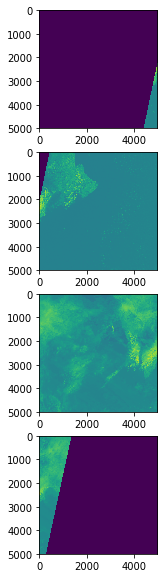

In [4]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1, figsize=(10,10))

im=ax1.imshow(nir_landsat_pre1[0])
im=ax2.imshow(nir_landsat_pre2[0])
im=ax3.imshow(nir_landsat_pre3[0])
im=ax4.imshow(nir_landsat_pre4[0])

plt.show()

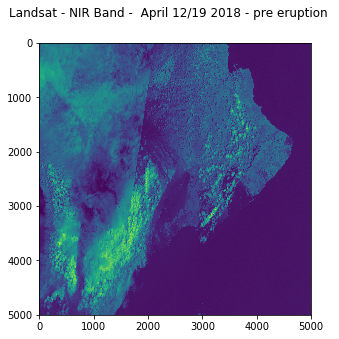

In [5]:
with rio.open("/Users/shannonwhite/git/data/Landsat/outputsL/landsat_pre_nir.tif") as src1_landsat:
    landsat_pre = src1_landsat.read()
    #masked_landsat1 = ma.masked_where(landsat_pre== -9999.0, landsat_pre)
    

fig,ax1=plt.subplots(figsize=(5,5))

im=ax1.imshow(landsat_pre[0])


plt.suptitle('Landsat - NIR Band -  April 12/19 2018 - pre eruption ', fontsize=12)
plt.show()

### The post scene was much clearer. 

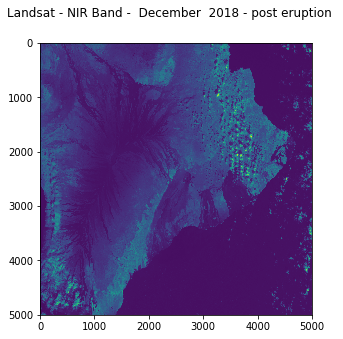

In [6]:
with rio.open("/Users/shannonwhite/git/data/Landsat/outputsL/landsat_post_nir.tif") as src2_landsat:
    landsat_post = src2_landsat.read()
    
    
fig,ax1=plt.subplots(figsize=(5,5))

im=ax1.imshow(landsat_post[0])
plt.suptitle('Landsat - NIR Band -  December 8/15, 2018 - post eruption ', fontsize=12)
plt.show()

## Landsat dNDVI

/Users/shannonwhite/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/numpy/ma/core.py:2206: RuntimeWarning: invalid value encountered in less
  condition = (xf < v1) | (xf > v2)
/Users/shannonwhite/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/numpy/ma/core.py:2206: RuntimeWarning: invalid value encountered in greater
  condition = (xf < v1) | (xf > v2)


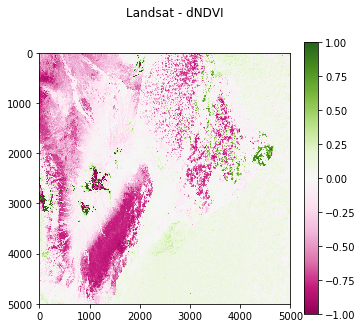

In [61]:

with rio.open("/Users/shannonwhite/git/data/Landsat/outputsL/dndvi_landsat.tif") as landsat_dndvi:
    dndvi_landsat = landsat_dndvi.read()
    
dndvi_range = ma.masked_outside(dndvi_landsat, -1, 1)

fig,ax1=plt.subplots(figsize=(5,5))


im=ax1.imshow(dndvi_landsat [0],  
              cmap='PiYG',
              vmin=-1,
              vmax=1)
fig.colorbar(im, ax=ax1, fraction=.05)


plt.suptitle('Landsat - dNDVI', fontsize=12)
plt.show()

Landsat data does show a change in NDVI from the pre and post eruption, but the data has a lot of uncertainty due to the cloud cover. 

# Aster Data
Aster data provides high resolution imagery without much cloud interferance. However, finding a frame that encompasses my study area has been an issue (across all of my data sources). Below is the are the post and the pre NDVI images, though they look slightly different.  

### Pre and Post NDVI Images 

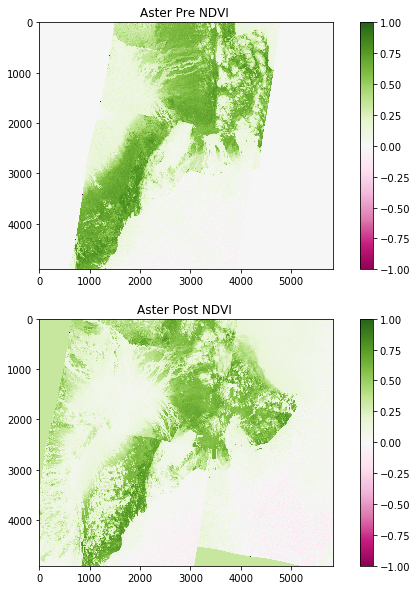

In [43]:

with rio.open("/Users/shannonwhite/git/data/ASTER/outputA/pre_ndvi_rf.tif") as pre_ndvi:
    pre = pre_ndvi.read()


with rio.open("/Users/shannonwhite/git/data/ASTER/outputA/post_ndvi_rf.tif") as post_ndvi:
    post = post_ndvi.read()
        
fig,(ax1, ax2)=plt.subplots(2,1, figsize=(10,10))

im=ax1.imshow(pre[0], cmap='PiYG',
              vmin=-1,
              vmax=1)
im=ax2.imshow(post[0], cmap='PiYG',
              vmin=-1,
              vmax=1)
fig.colorbar(im, ax=ax1, fraction=.05)
fig.colorbar(im, ax=ax2, fraction=.05)
ax1.set(title= "Aster Pre NDVI ")
ax2.set(title= "Aster Post NDVI ")
plt.show()

### dNDVI Image 

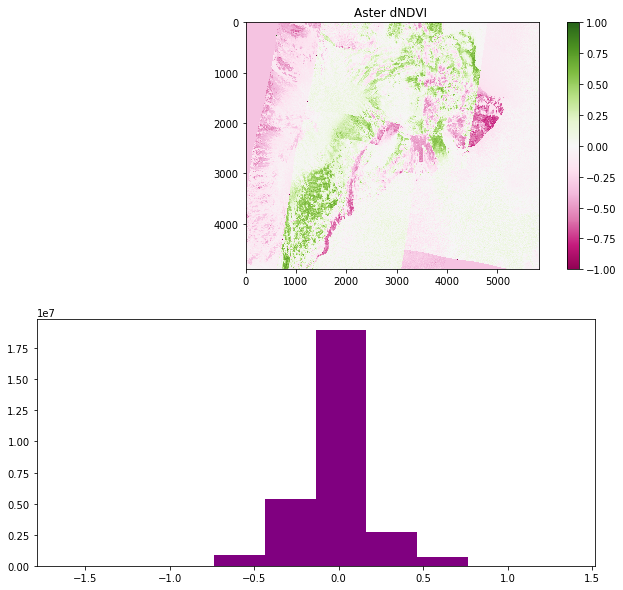

In [51]:
with rio.open("/Users/shannonwhite/git/data/ASTER/outputA/dndvi_aster.tif") as dndvi:
    dndvi_a = dndvi.read()

fig,(ax1, ax2)=plt.subplots(2,1, figsize=(10,10))

im1=ax1.imshow(dndvi_a[0], cmap='PiYG',
              vmin=-1,
              vmax=1)
fig.colorbar(im1, ax=ax1, fraction=.05)

im=ax2.hist(dndvi_a.ravel(), color='purple')

ax1.set(title= "Aster dNDVI ")
        
plt.show()

### The dNDVI image does show a decrease in vegetation. 

# MODIS 
MODIS data is hard to determine whether it is a quality image or if it is mostly clouds. 

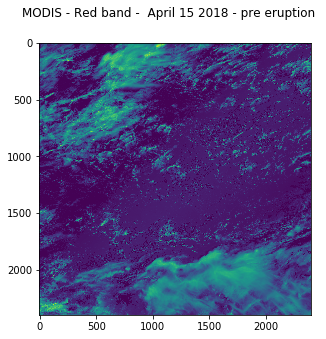

In [10]:
with rio.open("/Users/shannonwhite/git/data/MODIS/outputM/MOD09GA.A2018105.h03v07.006.2018107025338.2018.15.04-sd12.tif") as src4_red:
    red1 = src4_red.read()
    masked_red1 = ma.masked_where(red1== -28672, red1)
        
fig,ax1=plt.subplots(figsize=(5,5))

im=ax1.imshow(masked_red1[0])
plt.suptitle('MODIS - Red band -  April 15 2018 - pre eruption ', fontsize=12)
plt.show()

Through Earth Explorer, I was able to download MODIS calculted NDVI images, which will allow for more accuracy in calculations and less (unknown) disturbance from clouds. 

However, the MODIS resolution is very low so satellite imagery from Aster or Landsat are good to have as comparison in an anlysis. 

## Pre Eruption NDVI Image - February 2, 2018

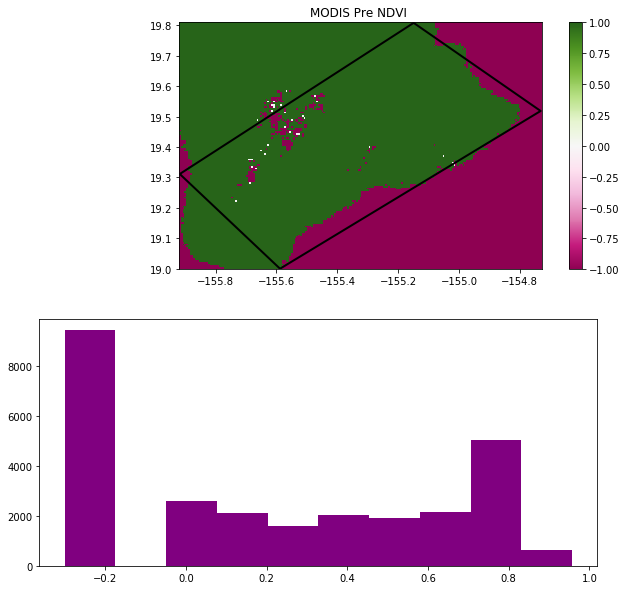

In [52]:
boundary_eruption = gpd.read_file(
    '/Users/shannonwhite/git/area_point_layer/POLYGON.shp')


with rio.open("/Users/shannonwhite/git/data/MODIS/outputM/ndvi_pre2.tif") as src_ndvi_2:
    ndvi_2 = src_ndvi_2.read()
    pre_modis_meta = src_ndvi_2.profile
    
    
    ndvi_pre_crop, ndvi_pre_meta = es.crop_image(
        src_ndvi_2, boundary_eruption)
    
    pre_ndvi_crop_scaled = ndvi_pre_crop*.0001
    
ndvi_extent = plotting_extent(ndvi_pre_crop[0], transform = ndvi_pre_meta['transform'])



fig,(ax1, ax2)=plt.subplots(2,1, figsize=(10,10))

im=ax1.imshow(ndvi_pre_crop[0], extent=ndvi_extent, cmap='PiYG', vmin=-1,
              vmax=1)

boundary_eruption.plot(ax=ax1, color='None',
                       edgecolor='black', linewidth=2)
fig.colorbar(im, ax=ax1, fraction=.05)
im=ax2.hist(pre_ndvi_crop_scaled.ravel(), color='purple')       
ax1.set(title= "MODIS Pre NDVI ")
plt.show()

## Post Eruption - August 29, 2018

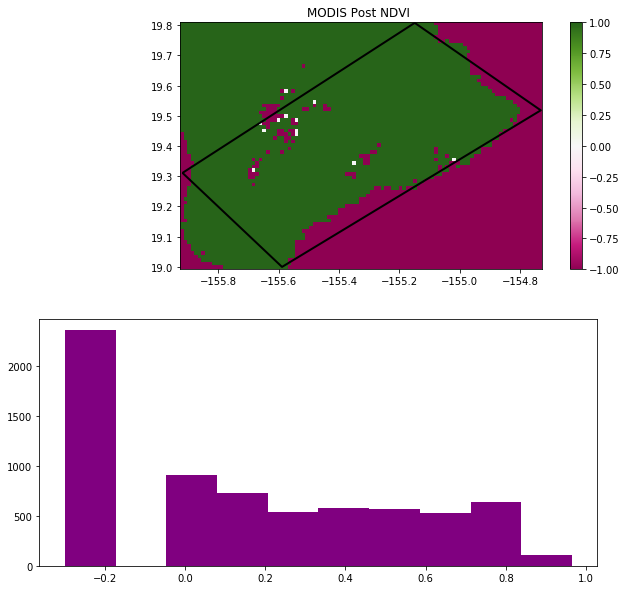

In [53]:
with rio.open("/Users/shannonwhite/git/data/MODIS/outputM/ndvi_post2.tif") as src_ndvi_3:
    ndvi_3 = src_ndvi_3.read()
    post_modis_meta = src_ndvi_3.profile
    
    
    ndvi_post_crop, ndvi_post_meta = es.crop_image(
        src_ndvi_3, boundary_eruption)
    
    post_ndvi_crop_scaled = ndvi_post_crop*.0001
    
ndvi_extent = plotting_extent(ndvi_post_crop[0], transform = ndvi_post_meta['transform'])


fig,(ax1, ax2)=plt.subplots(2,1, figsize=(10,10))

im=ax1.imshow(ndvi_post_crop[0], extent=ndvi_extent, cmap='PiYG', vmin=-1,
              vmax=1)

boundary_eruption.plot(ax=ax1, color='None',
                       edgecolor='black', linewidth=2)
fig.colorbar(im, ax=ax1, fraction=.05)
im=ax2.hist(post_ndvi_crop_scaled.ravel(), color='purple')       
ax1.set(title= "MODIS Post NDVI ")
plt.show()

## MODIS dNDVI 

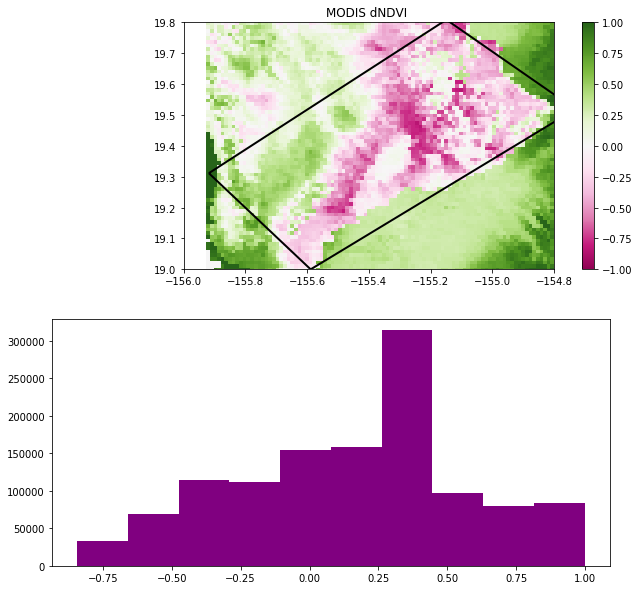

In [54]:
with rio.open("/Users/shannonwhite/git/data/MODIS/outputM/modis_dndvi.tif") as m_dndvi:
    dndvi = m_dndvi.read()

dndvi_range = ma.masked_outside(dndvi, -1, 1)

ndvi_extent = plotting_extent(ndvi_post_crop[0], transform = ndvi_post_meta['transform'])

#fig,ax1=plt.subplots(figsize=(8,8))
fig,(ax1, ax2)=plt.subplots(2,1, figsize=(10,10))

im=ax1.imshow(dndvi[0], extent=ndvi_extent, cmap='PiYG', vmin=-1.0, vmax=1.0)

# left and right coordinate
ax1.set_xlim((-156.0, -154.8))

# bottom and top coordinate
ax1.set_ylim((19.0, 19.8))

boundary_eruption.plot(ax=ax1, color='None',
                       edgecolor='black', linewidth=2)
fig.colorbar(im, ax=ax1, fraction=.05)
im=ax2.hist(dndvi_range.ravel(), color='purple')        
ax1.set(title= "MODIS dNDVI ")
plt.show()

### MODIS data also shows a decrease in vegeation

# Pollution 
### The air people were breathing was more hazardous than the flow of lava 

I am also comparing pollutants in the air around the time of the eruption.  

**Sulfure dioxide** is a major pollutant that is dangerous for human health. 

High concentrations of SO2 can cause inflammation and irritation of the respiratory system, and can affect lung function, worsen asthma attacks, and worsen existing heart disease.

In 2010, EPA revised the primary SO2 National Ambient Air Quality Standards (NAAQS) by establishing a new 1-hour standard at a level of 75 parts per billion (ppb). The graph shows all of the peaks being way higher than this standard. In fact, during the eruption, the highest concentration was **1806 ppb** on July 23, 2018 - 173% above the standard. 

The graph below also showes that four of the top five instances were recorded during the eruption (May - August).


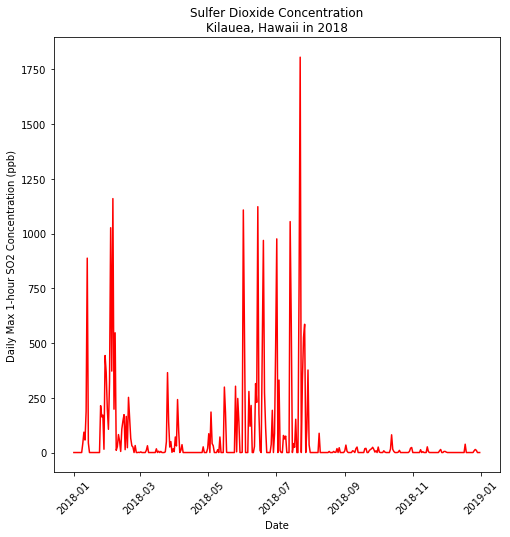

In [55]:
so2_datetime = pd.read_csv("/Users/shannonwhite/git/data/so22_ad_viz_plotval_data.csv",
                             parse_dates = ['Date'],
                             index_col = ['Date'])

fig,ax=plt.subplots(figsize=(8,8))

# add the x-axis and the y-axis to the plot
ax.plot(so2_datetime.index.values, 
        so2_datetime['Daily Max 1-hour SO2 Concentration'], 
        color = 'red')

# rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45)

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Daily Max 1-hour SO2 Concentration (ppb)",
       title="Sulfer Dioxide Concentration\nKilauea, Hawaii in 2018");

In [56]:
so2_datetime.sort_values(by="Daily Max 1-hour SO2 Concentration", ascending = False).head()

,Source,Site ID,POC,Daily Max 1-hour SO2 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
Date,,,,,,,,,,,,,,,,,,,
2018-07-23,AQS,150010005.0,1.0,1806.0,ppb,200.0,Hawaii Volcanoes NP - Kilauea Visitors Center,23.0,96.0,42401.0,Sulfur dioxide,25900.0,"Hilo, HI",15.0,Hawaii,1.0,Hawaii,19.4308,-155.2578
2018-02-05,AQS,150010005.0,1.0,1160.0,ppb,200.0,Hawaii Volcanoes NP - Kilauea Visitors Center,23.0,96.0,42401.0,Sulfur dioxide,25900.0,"Hilo, HI",15.0,Hawaii,1.0,Hawaii,19.4308,-155.2578
2018-06-15,AQS,150010005.0,1.0,1123.0,ppb,200.0,Hawaii Volcanoes NP - Kilauea Visitors Center,23.0,96.0,42401.0,Sulfur dioxide,25900.0,"Hilo, HI",15.0,Hawaii,1.0,Hawaii,19.4308,-155.2578
2018-06-02,AQS,150010005.0,1.0,1108.0,ppb,200.0,Hawaii Volcanoes NP - Kilauea Visitors Center,23.0,96.0,42401.0,Sulfur dioxide,25900.0,"Hilo, HI",15.0,Hawaii,1.0,Hawaii,19.4308,-155.2578
2018-07-14,AQS,150010005.0,1.0,1055.0,ppb,200.0,Hawaii Volcanoes NP - Kilauea Visitors Center,23.0,96.0,42401.0,Sulfur dioxide,25900.0,"Hilo, HI",15.0,Hawaii,1.0,Hawaii,19.4308,-155.2578


Another hazardous pollutant emitted by volcanoes is particulate matter (PM), which becomes more hazardous as the particles get smaller. Particulate matter of 2.5μg/m3 (PM2.5) cannot be seen with a naked eye yet can be dangerous to human health.

Studies have found a close link between exposure to fine particles (PM2.5) and premature death from heart and lung disease. Fine particles are also known to trigger or worsen chronic disease such as asthma, heart attacks, bronchitis and other respiratory problems. 

The 24-hour concentration of PM2.5 is considered detrimental to health when it rises above 35.4 μg/m3, indicated by the black line on the graph below.

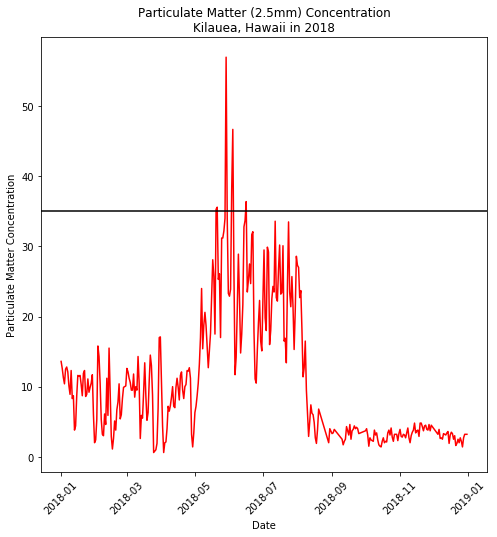

In [57]:
pm_datetime = pd.read_csv("/Users/shannonwhite/git/data/pm_ad_viz_plotval_data.csv",
                             parse_dates = ['Date'],
                             index_col = ['Date'])

fig,ax1=plt.subplots(figsize=(8,8))

# add the x-axis and the y-axis to the plot
ax1.plot(pm_datetime.index.values, 
        pm_datetime['Daily Mean PM2.5 Concentration'], 
        color = 'red')
ax1.axhline(y=35.0, color='k', linestyle='-')
# rotate tick labels
plt.setp(ax1.get_xticklabels(), rotation=45)


# set title and labels for axes
ax1.set(xlabel="Date",
       ylabel="Particulate Matter Concentration",
       title="Particulate Matter (2.5mm) Concentration\nKilauea, Hawaii in 2018");